# SHAP for Regression Model
- Reference: 
    - [Introduction to SHAP with Python](https://medium.com/towards-data-science/introduction-to-shap-with-python-d27edc23c454)

In [43]:
import pandas as pd
import numpy as np

from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

import xgboost as xgb

import shap
shap.initjs()

- Goal: to predict the abalone's age (or the number of rings in the abalone shell)

In [21]:
# import dataset
df = pd.read_csv(
    "../../../data/common_datasets/abalone.data",
    names=[
        "sex",
        "length",
        "diameter",
        "height",
        "whole weight",
        "shucked weight",
        "viscera weight",
        "shell weight",
        "rings",
    ],
)


In [20]:
df.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [16]:
num_pipeline = make_pipeline(
    SimpleImputer(strategy="median")
)
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder()
)
preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_exclude=np.number)),
    remainder='passthrough',   # 'drop' and 'passthrough'
    n_jobs=-1
)          # n_job = -1 means that we'll be using all processors to run in parallel.


In [23]:
X = df.drop(columns=["rings"])
y = df[["rings"]]

In [25]:
X_transformed = preprocessing.fit_transform(X, y)

In [29]:
X_transformed_df = pd.DataFrame(X_transformed, columns=preprocessing.get_feature_names_out())
X_transformed_df.head()

,pipeline-1__length,pipeline-1__diameter,pipeline-1__height,pipeline-1__whole weight,pipeline-1__shucked weight,pipeline-1__viscera weight,pipeline-1__shell weight,pipeline-2__sex_F,pipeline-2__sex_I,pipeline-2__sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0.0,0.0,1.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0.0,0.0,1.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1.0,0.0,0.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0.0,0.0,1.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0.0,1.0,0.0


In [31]:
#Train model
model = xgb.XGBRegressor(objective="reg:squarederror") 
model.fit(X_transformed_df, y)

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

## SHAP Explainer & Values
- SHAP's Explainer receives the model and calculate SHAP values for every observation in the feature
    - `shap.Explainer`
    - `shap.TreeExplainer`: The tree based machine learning model that we want to explain. XGBoost, LightGBM, CatBoost, Pyspark and most tree-based scikit-learn models
- SHAP values: 
    - There are 4177 observations in the feature df, and each observation contains 10 features.
    - Each observation will have 10 SHAP values: each SHAP value for each feature.
- `shap_values` object: consist of 3 components
    -  SHAP values (`values`) for each of the predictions. 
    - `data` gives the values for the features. 
    - `base_values` each prediction will also have the same base value ()

In [38]:
X_transformed_df.shape

(4177, 10)

In [63]:
explainer = shap.TreeExplainer(model)
# get the SHAP values
shap_values = explainer(X_transformed_df)
# set a display version of the data to use for plotting (has string values)
# need to set this in order to access the SHAP values corresponding to a feature by name: shap_values[:, "col_name"]
shap_values.display_data = shap.datasets.adult(display=True)[0].values

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


In [64]:
shap_value_df = pd.DataFrame(shap_values.values, columns = X_transformed_df.columns)

## Waterfall
- Waterfall plot is to explain how the features have contributed to a single prediction when compared to the mean prediction
    - Each observation will have a unique waterfall plot
- Waterfall plot understanding:
    - $E[f(x)]$  gives the average predicted number of rings across all the prediction
    - $f(x)$ gives the predicted number of rings for this particular observation

$$f(x)=E[f(x)] + \text{SHAP values}$$

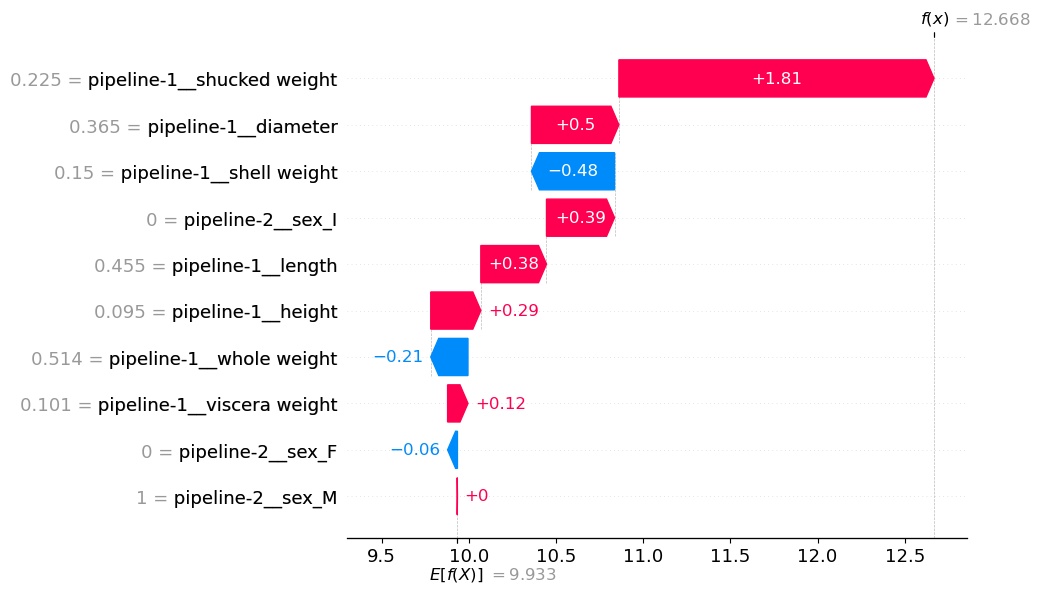

In [65]:
# apply the waterfall plot for the first observation
shap.plots.waterfall(shap_values[0])

## Force Plot (Condensed Waterfall Plot)

In [66]:
# Forceplot for first observation
shap.plots.force(shap_values[0])

## Stacked Force Plot
- Waterfall & force plots are great for interpreting **individual** predictions.
- Stacked force plot is to aggregate SHAP values to understand how our model makes predictions in general.
- For example, in the plot below we have:
    - Only displayed the SHAP values for feature "shell weight" (y-axis = shell weight effects)
    - Ordered the force plots by the "shell weight" feature values (x-axis = shell weight)
    - From this plot, as shell weight increases the SHAP values also increase. 
        - In other words, older (more number of rings) abalones tend to have heavier shells.

In [45]:
# aggregate on first 100 observations
shap.plots.force(shap_values[0:100])

## Mean SHAP Plot
- For each feature, we calculate the **mean absolute of SHAP value** across all observations as we do not want positive and negative values to offset each other. 

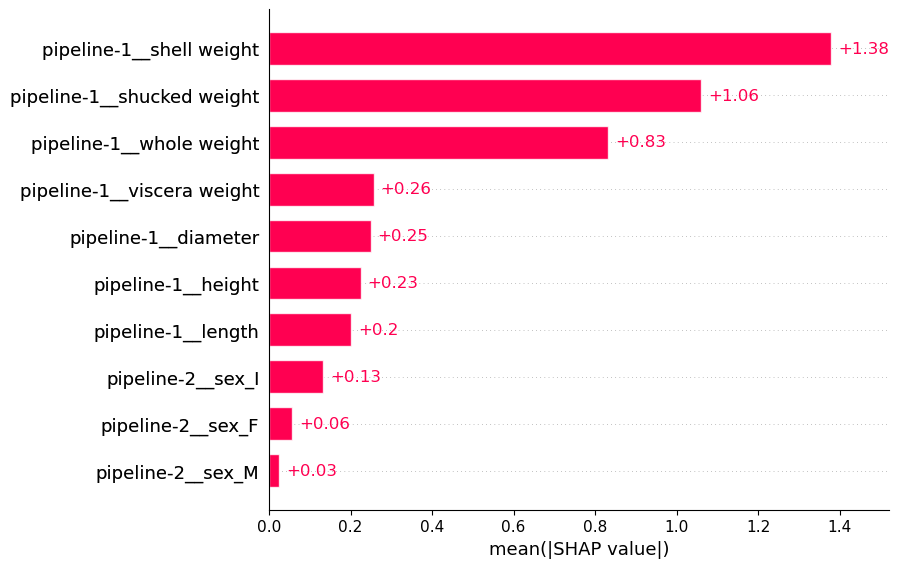

In [46]:
#Mean SHAP
shap.plots.bar(shap_values)

## Beeswarm
- The beeswarm visualises all of the SHAP values & like mean SHAP, the beeswarm can be used to highlight important relationships. 
    - In fact, the features in the beeswarm plot are ordered by mean SHAP.
- On y-axis, the values are grouped by feature.
    - The colour of the points is determined by the feature value (i.e. higher feature values are redder).

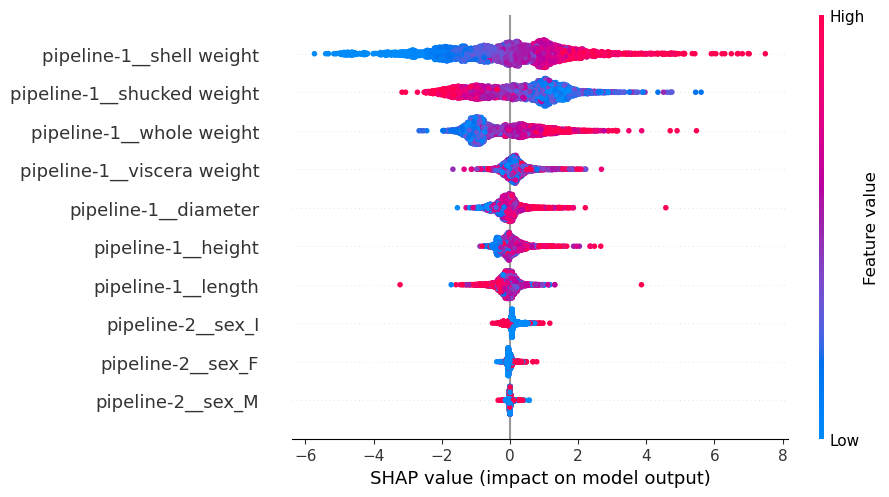

In [52]:
# Beeswarm plot
shap.plots.beeswarm(shap_values)